### OBJECTIVE: 
The main objective is to analyse the dataset of the existing customers to determine customer trends and behaviours and using these details recommend which new customers should be targeted for gaining more profits to the company.

In [215]:
#Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as ma
import warnings
warnings.filterwarnings("ignore")

In [216]:
Cust_master = pd.read_csv("Customer_Master.csv")
Cust_master.head()

customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp  Female   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases         DOB               job_title  \
0                                   93  1953-10-12     Executive Secretary   
1                                   81  1980-12-16  Administrative Officer   
2                                   61  1954-01-20      Recruiting Manager   
3                                   33  1961-10-03                     NaN   
4                                   56  1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator owns_car  \
0                Health      Mass Customer                  N      Yes   
1    Financial Services      Mass Customer                  N      Yes   
2              Property      Mass Customer                  N      Yes   
3                    IT      Mass Customer                  N       No   
4                   NaN  Affluent Customer                  N      Yes   

   tenure              address  postcode            state    country  \
0    11.0   060 Morning Avenue    2016.0  New South Wales  Australia   
1    16.0  6 Meadow Vale Court    2153.0  New South Wales  Australia   
2    15.0                  NaN       NaN              NaN        NaN   
3     7.0   0 Holy Cross Court    4211.0              QLD  Australia   
4     8.0  17979 Del Mar Point    2448.0  New South Wales  Australia   

   property_valuation  Rank  Value  
0                10.0   NaN    NaN  
1                10.0   NaN    NaN  
2                 NaN   NaN    NaN  
3                 9.0   NaN    NaN  
4                 4.0   NaN    NaN

In [217]:
NewCustList = pd.read_excel(r"KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="NewCustomerList")
NewCustList.head()

Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.   \
0                                         first_name                                                                                                                              
1                                            Chickie                                                                                                                              
2                                              Morly                                                                                                                              
3                                            Ardelis                                                                                                                              
4                                             Lucine                                                                                                                              

  Unnamed: 1 Unnamed: 2                           Unnamed: 3  \
0  last_name     gender  past_3_years_bike_related_purchases   
1    Brister       Male                                   86   
2     Genery       Male                                   69   
3  Forrester     Female                                   10   
4      Stutt     Female                                   64   

            Unnamed: 4                  Unnamed: 5             Unnamed: 6  \
0                  DOB                   job_title  job_industry_category   
1           1957-07-12             General Manager          Manufacturing   
2           1970-03-22         Structural Engineer               Property   
3  1974-08-28 00:00:00      Senior Cost Accountant     Financial Services   
4           1979-01-28  Account Representative III          Manufacturing   

          Unnamed: 7          Unnamed: 8 Unnamed: 9  ... Unnamed: 13  \
0     wealth_segment  deceased_indicator   owns_car  ...       state   
1      Mass Customer                   N        Yes  ...         QLD   
2      Mass Customer                   N         No  ...         NSW   
3  Affluent Customer                   N         No  ...         VIC   
4  Affluent Customer                   N        Yes  ...         QLD   

  Unnamed: 14         Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18  \
0     country  property_valuation         NaN         NaN         NaN   
1   Australia                   6        0.56      0.7000      0.8750   
2   Australia                  11        0.89      0.8900      1.1125   
3   Australia                   5        1.01      1.0100      1.0100   
4   Australia                   1        0.87      1.0875      1.0875   

   Unnamed: 19  Unnamed: 20  Unnamed: 21  Unnamed: 22  
0          NaN          NaN         Rank        Value  
1     0.743750          1.0            1      1.71875  
2     0.945625          1.0            1      1.71875  
3     1.010000          1.0            1      1.71875  
4     1.087500          4.0            4      1.70312  

[5 rows x 23 columns]

In [218]:
# Renaming the columns
NewCustList.rename(columns={"Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ":"fname"}, inplace = True)
NewCustList.rename(columns={"Unnamed: 1":"lname",
                   "Unnamed: 2":"gender",
                   "Unnamed: 3":"3y_bike_purchases",
                   "Unnamed: 4":"DOB",
                   "Unnamed: 5":"JobTitle",
                   "Unnamed: 6":"Category"}, inplace = True)
NewCustList.rename(columns={"Unnamed: 7":"wealth_segment",
                   "Unnamed: 8":"Deceased_Indicator",
                   "Unnamed: 9":"owns_car",
                   "Unnamed: 10":"tencure",
                   "Unnamed: 11":"address",
                   "Unnamed: 12":"postcode"}, inplace = True)
NewCustList.rename(columns={"Unnamed: 13":"state",
                   "Unnamed: 14":"country",
                   "Unnamed: 15":"prop_val",
                   "Unnamed: 21":"rank",
                   "Unnamed: 22":"value"}, inplace = True)
NewCustList=NewCustList.iloc[1:]
NewCustList

fname      lname  gender 3y_bike_purchases                  DOB  \
1       Chickie    Brister    Male                86           1957-07-12   
2         Morly     Genery    Male                69           1970-03-22   
3       Ardelis  Forrester  Female                10  1974-08-28 00:00:00   
4        Lucine      Stutt  Female                64           1979-01-28   
5       Melinda     Hadlee  Female                34           1965-09-21   
...         ...        ...     ...               ...                  ...   
996   Ferdinand  Romanetti    Male                60           1959-10-07   
997        Burk    Wortley    Male                22           2001-10-17   
998    Melloney      Temby  Female                17           1954-10-05   
999      Dickie    Cubbini    Male                30           1952-12-17   
1000      Sylas    Duffill    Male                56           1955-10-02   

                          JobTitle            Category     wealth_segment  \
1                  General Manager       Manufacturing      Mass Customer   
2              Structural Engineer            Property      Mass Customer   
3           Senior Cost Accountant  Financial Services  Affluent Customer   
4       Account Representative III       Manufacturing  Affluent Customer   
5                Financial Analyst  Financial Services  Affluent Customer   
...                            ...                 ...                ...   
996                      Paralegal  Financial Services  Affluent Customer   
997         Senior Sales Associate              Health      Mass Customer   
998   Budget/Accounting Analyst IV  Financial Services  Affluent Customer   
999              Financial Advisor  Financial Services      Mass Customer   
1000           Staff Accountant IV            Property      Mass Customer   

     Deceased_Indicator owns_car  ... state    country prop_val Unnamed: 16  \
1                     N      Yes  ...   QLD  Australia        6        0.56   
2                     N       No  ...   NSW  Australia       11        0.89   
3                     N       No  ...   VIC  Australia        5        1.01   
4                     N      Yes  ...   QLD  Australia        1        0.87   
5                     N       No  ...   NSW  Australia        9        0.52   
...                 ...      ...  ...   ...        ...      ...         ...   
996                   N       No  ...   NSW  Australia        7        0.79   
997                   N       No  ...   NSW  Australia       10        0.76   
998                   N      Yes  ...   QLD  Australia        2        0.85   
999                   N      Yes  ...   QLD  Australia        2        1.09   
1000                  N      Yes  ...   NSW  Australia        9        0.47   

     Unnamed: 17 Unnamed: 18  Unnamed: 19  Unnamed: 20  rank    value  
1         0.7000    0.875000     0.743750          1.0     1  1.71875  
2         0.8900    1.112500     0.945625          1.0     1  1.71875  
3         1.0100    1.010000     1.010000          1.0     1  1.71875  
4         1.0875    1.087500     1.087500          4.0     4  1.70312  
5         0.5200    0.650000     0.650000          4.0     4  1.70312  
...          ...         ...          ...          ...   ...      ...  
996       0.7900    0.790000     0.790000        996.0   996    0.374  
997       0.7600    0.950000     0.807500        997.0   997    0.357  
998       1.0625    1.062500     1.062500        997.0   997    0.357  
999       1.3625    1.362500     1.158125        997.0   997    0.357  
1000      0.5875    0.734375     0.624219       1000.0  1000     0.34  

[1000 rows x 23 columns]

### Inspecting the datasets

In [219]:
Cust_master.shape

(5000, 19)

In [220]:
Cust_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          5000 non-null   int64  
 1   first_name                           5000 non-null   object 
 2   last_name                            4846 non-null   object 
 3   gender                               5000 non-null   object 
 4   past_3_years_bike_related_purchases  5000 non-null   int64  
 5   DOB                                  4896 non-null   object 
 6   job_title                            4388 non-null   object 
 7   job_industry_category                4179 non-null   object 
 8   wealth_segment                       5000 non-null   object 
 9   deceased_indicator                   5000 non-null   object 
 10  owns_car                             5000 non-null   object 
 11  tenure                        

In [221]:
Cust_master.describe()

customer_id  past_3_years_bike_related_purchases       tenure  \
count  5000.000000                          5000.000000  4913.000000   
mean   2500.500000                            49.079200    10.805821   
std    1443.520003                            28.533471     5.546347   
min       1.000000                             0.000000     0.000000   
25%    1250.750000                            24.000000     6.000000   
50%    2500.500000                            49.000000    11.000000   
75%    3750.250000                            73.000000    15.000000   
max    5000.000000                            99.000000    22.000000   

          postcode  property_valuation         Rank        Value  
count  4996.000000         4996.000000  1000.000000  1000.000000  
mean   2992.439151            7.490592   498.819000     0.881714  
std     845.758829            2.812334   288.810997     0.293525  
min    2000.000000            1.000000     1.000000     0.340000  
25%    2203.000000            6.000000   250.000000     0.649531  
50%    2768.000000            8.000000   500.000000     0.860000  
75%    3787.250000           10.000000   750.250000     1.075000  
max    4883.000000           12.000000  1000.000000     1.718750

In [222]:
Cust_master.isnull().sum()

customer_id                               0
first_name                                0
last_name                               154
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     104
job_title                               612
job_industry_category                   821
wealth_segment                            0
deceased_indicator                        0
owns_car                                  0
tenure                                   87
address                                   4
postcode                                  4
state                                     4
country                                   4
property_valuation                        4
Rank                                   4000
Value                                  4000
dtype: int64

In [223]:
Cust_master.duplicated().sum()

0

In [224]:
NewCustList.shape

(1000, 23)

In [225]:
NewCustList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fname               1000 non-null   object 
 1   lname               971 non-null    object 
 2   gender              1000 non-null   object 
 3   3y_bike_purchases   1000 non-null   object 
 4   DOB                 983 non-null    object 
 5   JobTitle            894 non-null    object 
 6   Category            835 non-null    object 
 7   wealth_segment      1000 non-null   object 
 8   Deceased_Indicator  1000 non-null   object 
 9   owns_car            1000 non-null   object 
 10  tencure             1000 non-null   object 
 11  address             1000 non-null   object 
 12  postcode            1000 non-null   object 
 13  state               1000 non-null   object 
 14  country             1000 non-null   object 
 15  prop_val            1000 non-null   object 
 16  Unname

In [226]:
NewCustList.describe()

Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean      0.747340     0.839005     0.942673     0.870514   498.819000
std       0.205082     0.248858     0.294832     0.280891   288.810997
min       0.400000     0.400000     0.400000     0.340000     1.000000
25%       0.570000     0.637500     0.712500     0.658750   250.000000
50%       0.750000     0.820000     0.912500     0.842625   500.000000
75%       0.920000     1.031875     1.142969     1.062500   750.250000
max       1.100000     1.375000     1.718750     1.718750  1000.000000

In [227]:
NewCustList.isnull().sum()

fname                   0
lname                  29
gender                  0
3y_bike_purchases       0
DOB                    17
JobTitle              106
Category              165
wealth_segment          0
Deceased_Indicator      0
owns_car                0
tencure                 0
address                 0
postcode                0
state                   0
country                 0
prop_val                0
Unnamed: 16             0
Unnamed: 17             0
Unnamed: 18             0
Unnamed: 19             0
Unnamed: 20             0
rank                    0
value                   0
dtype: int64

In [228]:
NewCustList.duplicated().sum()

0

In [229]:
NewCustList.gender.value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [230]:
# Replacing U with Unknown in the gender column
NewCustList['gender'] = NewCustList.gender.replace('U','Unknown')

In [231]:
NewCustList.gender.value_counts()

Female     513
Male       470
Unknown     17
Name: gender, dtype: int64

#### Gender Distribution

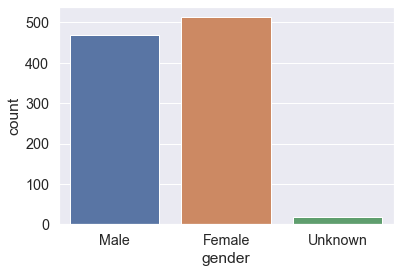

In [232]:
sns.countplot(x="gender",data = NewCustList)
plt.show()

#### Analyzing the gender vs bikes purchased in the previous 3 years

[513, 470, 17]


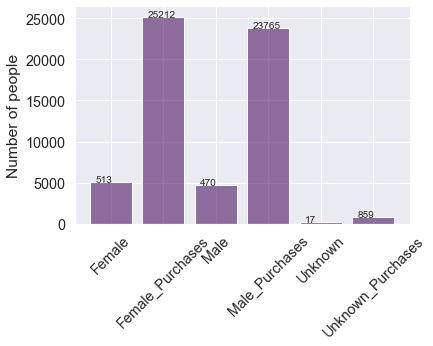

In [233]:
from matplotlib.ticker import FuncFormatter
gender = [0,0,0] # first is Female, second if Male, third is Unknown
for each in NewCustList['gender']:
    if each == "Female":
        gender[0] = gender[0] + 1
    elif each == "Male":
        gender[1] = gender[1] + 1
    else:
        gender[2] = gender[2] + 1

print(gender)
def gf(x, pos):
    #'The two args are the value and gender'
    return int(x)

bike = [0,0,0]
NewCustList[['3y_bike_purchases']] = NewCustList[['3y_bike_purchases']].apply(pd.to_numeric)
bike[0] += NewCustList['3y_bike_purchases'][NewCustList['gender'] == 'Female'].sum() 
bike[1] += NewCustList['3y_bike_purchases'][NewCustList['gender'] == 'Male'].sum()
bike[2] += NewCustList['3y_bike_purchases'][NewCustList['gender'] == 'Unknown'].sum()

grapho = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
graphl = [gender[0]*10, bike[0], gender[1]*10, bike[1], gender[2]*10, bike[2]]
colorr = (0.3,0.1,0.4,0.6)
#scale up gender by 10 for easier visualization
formatter = FuncFormatter(gf)
x = np.arange(6)
fig, ax = plt.subplots()
ax.set_ylabel('Number of people')
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, graphl, color = colorr)

for i in range(len(gender*2)):
    plt.text(x = i-0.3, y = graphl[i]+0.1, s = grapho[i], size = 10)

plt.xticks(x, ('Female', "Female_Purchases", 'Male', "Male_Purchases", 'Unknown', "Unknown_Purchases"),rotation=45)
plt.show()

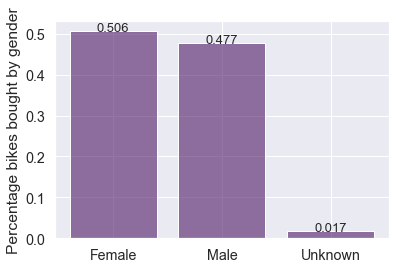

In [234]:
# Calculating the above data in terms of percentages
avg  = [0,0,0]
Total   = sum(bike)
for i in range(len(avg)):
    avg[i] += round(bike[i]/Total,3) 

x1 = np.arange(3)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Percentage bikes bought by gender')
plt.bar(x1, avg, color = colorr)
for i in range(len(avg)):
    plt.text(x = i-0.15, y = avg[i], s = avg[i], size = 13)

plt.xticks(x1, ('Female', 'Male', 'Unknown'))
plt.show()

#### Analyzing the columns `past_3_years_bike_related_purchases` and `Age`

In [235]:
# Extracting the Age in years (as of 2021) using the DOB column
import datetime
NewCustList["Age"]=0
length = len(NewCustList["DOB"])
k=0
for i in range(1,length):
    if isinstance(NewCustList["DOB"][i],datetime.date):
        tl = len(NewCustList["DOB"][i].ctime().split(" "))
        #print(tl)
        #print(int(NewCustList["DOB"][i].ctime().split(" ")[tl-1]))
        NewCustList["Age"][i] += int(2021 - int(NewCustList["DOB"][i].ctime().split(" ")[tl-1]))
    #type is string
    elif isinstance(NewCustList["DOB"][i], str):
        tl = len(NewCustList["DOB"][i].split("-"))
        NewCustList["Age"][i] += int(2021 - int(NewCustList["DOB"][i].split("-")[0]))
NewCustList.head()

fname      lname  gender  3y_bike_purchases                  DOB  \
1  Chickie    Brister    Male                 86           1957-07-12   
2    Morly     Genery    Male                 69           1970-03-22   
3  Ardelis  Forrester  Female                 10  1974-08-28 00:00:00   
4   Lucine      Stutt  Female                 64           1979-01-28   
5  Melinda     Hadlee  Female                 34           1965-09-21   

                     JobTitle            Category     wealth_segment  \
1             General Manager       Manufacturing      Mass Customer   
2         Structural Engineer            Property      Mass Customer   
3      Senior Cost Accountant  Financial Services  Affluent Customer   
4  Account Representative III       Manufacturing  Affluent Customer   
5           Financial Analyst  Financial Services  Affluent Customer   

  Deceased_Indicator owns_car  ...    country prop_val Unnamed: 16  \
1                  N      Yes  ...  Australia        6        0.56   
2                  N       No  ...  Australia       11        0.89   
3                  N       No  ...  Australia        5        1.01   
4                  N      Yes  ...  Australia        1        0.87   
5                  N       No  ...  Australia        9        0.52   

  Unnamed: 17 Unnamed: 18 Unnamed: 19  Unnamed: 20  rank    value  Age  
1      0.7000      0.8750    0.743750          1.0     1  1.71875   64  
2      0.8900      1.1125    0.945625          1.0     1  1.71875   51  
3      1.0100      1.0100    1.010000          1.0     1  1.71875   47  
4      1.0875      1.0875    1.087500          4.0     4  1.70312   42  
5      0.5200      0.6500    0.650000          4.0     4  1.70312   56  

[5 rows x 24 columns]

In [236]:
# Creating another column with age buckets as : 10 -20 , 21-30 , 31-40, 41-50,...
# pd.qcut(NewCustList['Age'], q=10)

In [237]:
# NewCustList.Age_Bucket = pd.qcut(NewCustList['Age'], q=10)

In [238]:
# Creating Age buckets for easier analysis
cut_labels = ['0-20','21-40','41-60','61-80','81-100']
cut_bins = [0,20,21,41,61,81]
NewCustList['Age_Buckets'] = pd.cut(NewCustList['Age'], bins=cut_bins, labels=cut_labels)
NewCustList.head()

fname      lname  gender  3y_bike_purchases                  DOB  \
1  Chickie    Brister    Male                 86           1957-07-12   
2    Morly     Genery    Male                 69           1970-03-22   
3  Ardelis  Forrester  Female                 10  1974-08-28 00:00:00   
4   Lucine      Stutt  Female                 64           1979-01-28   
5  Melinda     Hadlee  Female                 34           1965-09-21   

                     JobTitle            Category     wealth_segment  \
1             General Manager       Manufacturing      Mass Customer   
2         Structural Engineer            Property      Mass Customer   
3      Senior Cost Accountant  Financial Services  Affluent Customer   
4  Account Representative III       Manufacturing  Affluent Customer   
5           Financial Analyst  Financial Services  Affluent Customer   

  Deceased_Indicator owns_car  ... prop_val Unnamed: 16 Unnamed: 17  \
1                  N      Yes  ...        6        0.56      0.7000   
2                  N       No  ...       11        0.89      0.8900   
3                  N       No  ...        5        1.01      1.0100   
4                  N      Yes  ...        1        0.87      1.0875   
5                  N       No  ...        9        0.52      0.5200   

  Unnamed: 18 Unnamed: 19 Unnamed: 20  rank    value  Age  Age_Buckets  
1      0.8750    0.743750         1.0     1  1.71875   64       81-100  
2      1.1125    0.945625         1.0     1  1.71875   51        61-80  
3      1.0100    1.010000         1.0     1  1.71875   47        61-80  
4      1.0875    1.087500         4.0     4  1.70312   42        61-80  
5      0.6500    0.650000         4.0     4  1.70312   56        61-80  

[5 rows x 25 columns]

In [239]:
NewCustList.Age_Buckets.value_counts()

61-80     397
41-60     279
81-100    259
0-20       12
21-40      11
Name: Age_Buckets, dtype: int64

#### Analysing the gender distribution w.r.t. Age based on the last 3 years bike related purchases

In [240]:
corr = NewCustList.groupby(['gender', 'Age_Buckets'])['3y_bike_purchases'].sum().reset_index()

In [241]:
corr

gender Age_Buckets  3y_bike_purchases
0    Female        0-20              343.0
1    Female       21-40              255.0
2    Female       41-60             6820.0
3    Female       61-80            10775.0
4    Female      81-100             6301.0
5      Male        0-20              267.0
6      Male       21-40              121.0
7      Male       41-60             7654.0
8      Male       61-80             8920.0
9      Male      81-100             6259.0
10  Unknown        0-20                NaN
11  Unknown       21-40                NaN
12  Unknown       41-60                NaN
13  Unknown       61-80                NaN
14  Unknown      81-100                NaN

#### Analysing Age vs gender

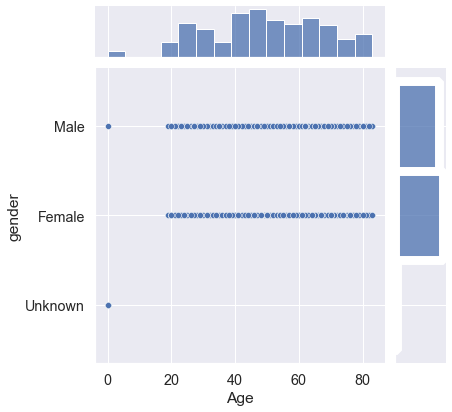

In [242]:
sns.jointplot(x='Age',y='gender',data=NewCustList)
plt.show()

#### Analyzing the column `job_title`

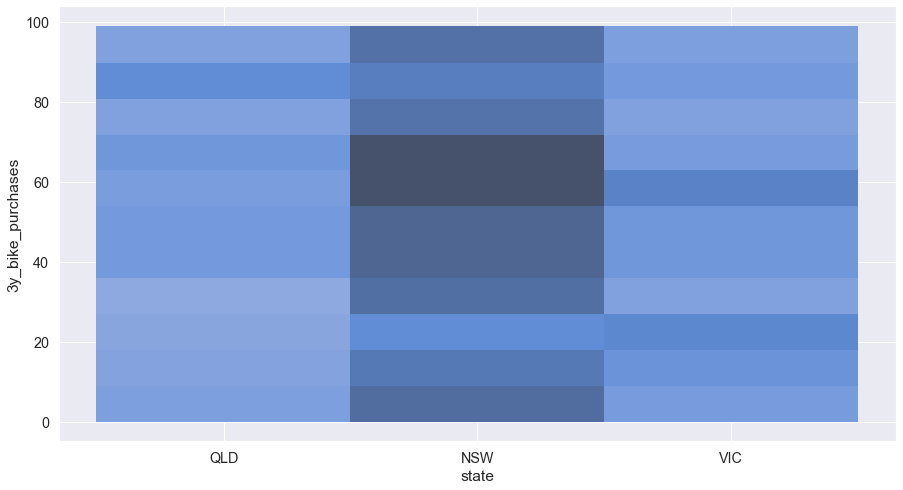

In [243]:
plt.figure(figsize = (15, 8))
sns.histplot(x='state', y='3y_bike_purchases',data = NewCustList)
plt.show()

#### Analysing the column `Job Category`

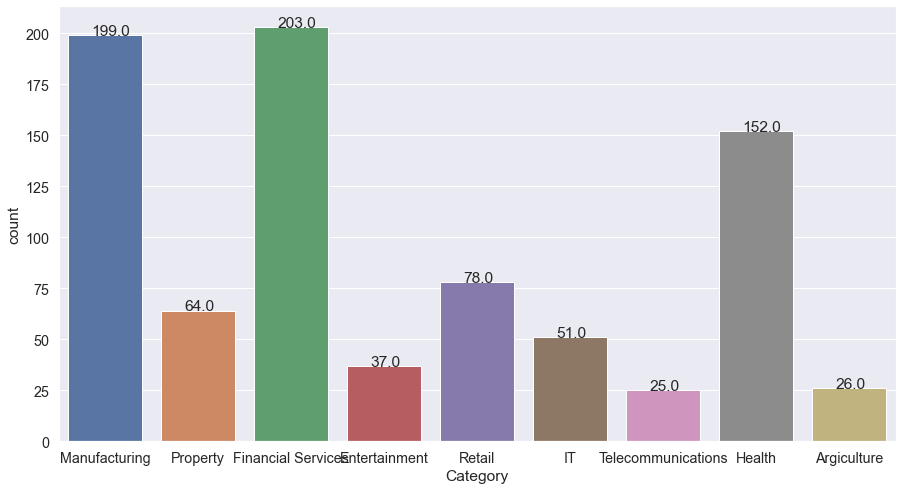

In [244]:
plt.figure(figsize = (15, 8))
ax = sns.countplot(data = NewCustList,x ='Category')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

#### Analyzing the column `Wealth_Segment`

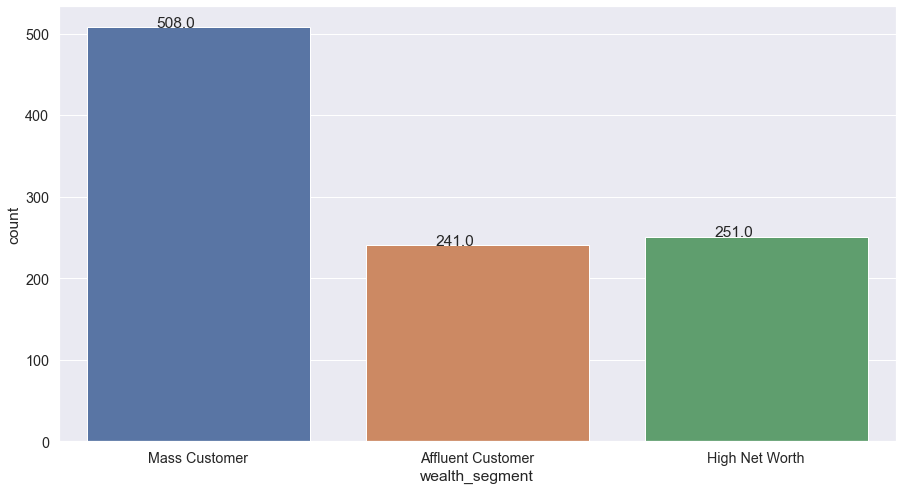

In [245]:
plt.figure(figsize = (15, 8))
ax = sns.countplot(data = NewCustList,x ='wealth_segment')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

#### Analyzing the column `wealth_segment` for both the New and Old Customer datasets

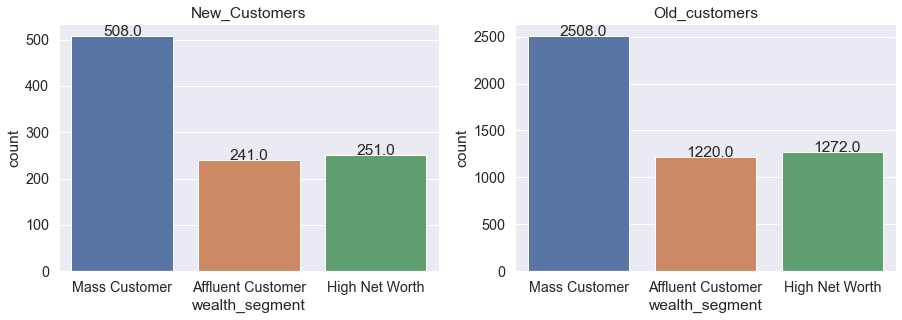

In [246]:
sns.set(font_scale=1.3)
#subplot 1
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
plt.title('New_Customers')
# plt.ylim(0,100000)
ax = sns.countplot(NewCustList['wealth_segment'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Old_customers')
# plt.ylim(0,100000)
ax = sns.countplot(Cust_master['wealth_segment'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

#### Analyzing the column `Job-Industry-category` for both the New and Old Customer datasets

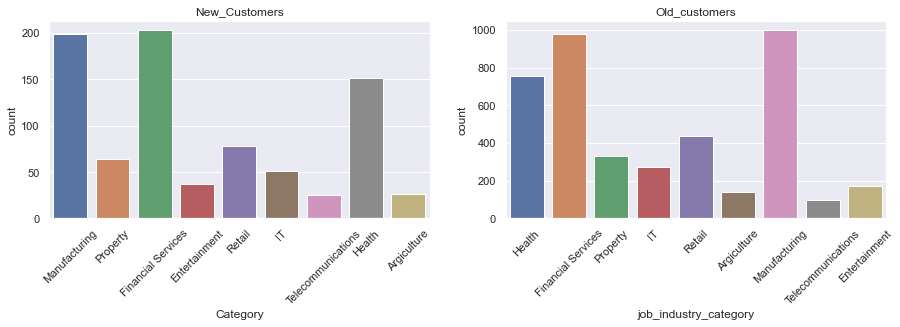

In [247]:
sns.set(font_scale=1)
#subplot 1
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.title('New_Customers')
# plt.ylim(0,100000)
plt.xticks(rotation=45)
sns.countplot(NewCustList['Category'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Old_customers')
plt.xticks(rotation=45)
# plt.ylim(0,100000)
sns.countplot(Cust_master['job_industry_category'])
plt.show()

### Final Recommendations to the Comapany:
- As can be seen from the graph, the new customers are mostly Female with 50.6% purchases with total of 25,212 bikes. Male contributed to 47.7% purchases with 23,765 bikes.So we should target more on Female customers than Male customers.

- It can be seen that the highest count of customers belong to the job category Financial Services (203) , Followed by Manufacturing (199).The company should target these job categories more while providing offers and discounts.

- The Mass Customer segment covers most of the customers(506) which comprises of 50.7% of the entire customer population. This is a good data to be focused upon while targeting the potential customers.

- As can be seen, the Mass Customer segment is dominant in both the old as well as new customer datasets.

- As can be seen, the Financial Services sector has maximum customers in the New dataset however, the Manufacturing sector has maximum customers in the old dataset. Hence, it can be seen that more customers are adding up from the Financial sector.